# 項目：視覺化帕默群島企鵝資料

## 分析目標

本資料分析報告的目的是對帕默群島上企鵝樣本的相關指標進行視覺化，從而探索和分析物種、性別、所在島嶼等因素，與企鵝的身體屬性，包括體重、嘴峰長度和深度、鰭的長度之間的關係


## 簡介

原始資料 `Penguins.csv` 包括 334 個收集自南極洲帕爾默群島的3個島嶼上的企鵝樣本，以及企鵝相關屬性資料，包括種類名、所在島、嘴峰長度、嘴峰深度、鰭長度、體重、性別

`Penguins.csv`每列的意思如下：
- species：企鵝的種類
- island：企鵝所在島
- culmen_length_mm：企鵝嘴峰的長度（單位為毫米）
- culmen_depth_mm：企鵝嘴峰的深度（單位為毫米）
- flipper_length_mm：企鵝鰭的長度（單位為毫米）
- body_mass_g：企鵝體重（單位為克）
- sex：企鵝性別

## 讀取資料

導入資料分析所需的函式庫，並透過 Pandas 的 `read_csv` 函數，將原始資料檔 `Penguins.csv` 裡的資料內容，解析為 DataFrame 並賦值給變數 `original_data`

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
original_data = pd.read_csv("Penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 評估和清理資料

在這一部分中，我們將對上一部分建立的 `original_data` DataFrame所包含的資料進行評估和清理

主要從兩個方面進行：結構和內容，即整齊度和乾淨度

資料的結構性問題指不符合「每個變數為一列，每個觀察值為一行，每種類型的觀察單位為一個表格」這三個標準；資料的內容性問題包括存在遺失資料、重複資料、無效資料等

為了區分開經過清理的資料和原始的資料，我們建立新的變數 `cleaned_data`，讓它為 `original_data` 複製出的副本。我們之後的清理步驟都會被運用在 `cleaned_data` 上

In [4]:
cleaned_data = original_data.copy()

### 資料整齊度

In [5]:
cleaned_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


從頭 10 行資料來看，資料符合“每個變數為一列，每個觀察值為一行，每種類型的觀察單位為一個表格”，因此不存在結構性問題

### 資料乾淨度

接下來透過 `info`，對資料內容進行大致了解

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


從輸出結果來看，`cleaned_data` 資料共有 344 個觀察值，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g` 變數存在缺失值，將在後續進行評估與清理

資料類型方面，我們已知 `species`（企鵝種類）`sex`（企鵝性別）、`island`（企鵝所在島）都是分類資料，因此可以把資料類型都轉換為 Category

In [7]:
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


#### 處理缺失資料

從`info`方法的輸出來看，在`cleaned_data`中，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`、`sex` 變數存在缺失值

先提取出缺失這些變數的觀察值進行檢視

In [9]:
cleaned_data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
cleaned_data.query("culmen_depth_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
cleaned_data.query("flipper_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [12]:
cleaned_data.query("body_mass_g.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


以上，可以看到索引為 3 和 339 的觀察值，除了種類和所屬島嶼外所有變數都為空，無法為探索企鵝身體屬性相關因素提供價值，因此可以把這兩行直接刪除

In [13]:
cleaned_data.drop(3, inplace=True)
cleaned_data.drop(339, inplace=True)

In [14]:
cleaned_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性別變數的觀察值具備其它資料，仍可為分析提供價值。由於 Pandas 以及 Matplotlib、Seaborn 會自動忽略缺失值，可以保留這些行

#### 處理重複資料

根據資料變數的含義以及內容來看，允許變數重複，我們不需要對此資料檢查是否有重複值。

#### 處理不一致資料

不一致資料可能存在於所有分類變數中，我們要查看是否存在不同值實際指涉相同目標的情況

In [15]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [16]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [17]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

從上述輸出來看，`species` 和 `island` 列裡並不存在不一致資料，但 `sex` 列裡存在一個英文句號值，並不代表任何有效性別，我們應該把該值替換為 `NaN` 空值

In [18]:
cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)

C:\Users\coast\AppData\Local\Temp\ipykernel_41656\4142074798.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)


查看英文句號值是否還存在

In [19]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

英文句號值已被替換為空值，因此 `sex` 列裡不存在不一致資料

#### 處理無效或錯誤資料

可以透過 DataFrame 的 `describe` 方法，對數值統計資訊進行快速了解

In [20]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


從以上統計資料來看，`cleaned_house_price` 裡不存在脫離現實意義的數值

## 探索資料

我們將透過資料視覺化，進行探索和分析，從圖表中獲得企鵝樣本資料的相關洞察

In [21]:
# 設置色盤"pastel"
sns.set_palette("pastel")

In [22]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鵝種類比例

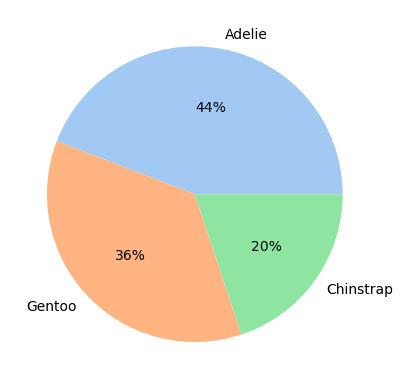

In [30]:
species_count = cleaned_data["species"].value_counts()
plt.pie(species_count, labels=species_count.index, autopct='%.0f%%')
plt.show()

樣本中 `Adelie ` 這個種類的企鵝比例最大，`Gentoo` 種類的比例其次，`Chinstrap` 的比例最小

### 企鵝所屬島嶼比例

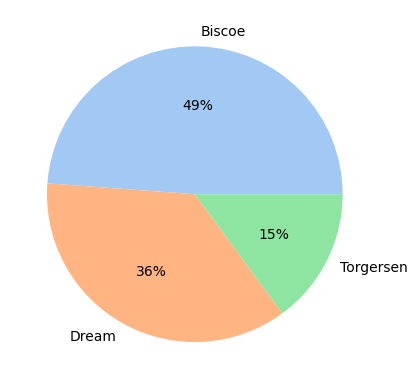

In [31]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, labels=island_count.index, autopct='%.0f%%')
plt.show()

樣本中一半左右的企鵝都來自 `Biscoe` 島，其次是 `Dream` 島，來自 `Torgersen` 島的最少

### 企鵝性別比例

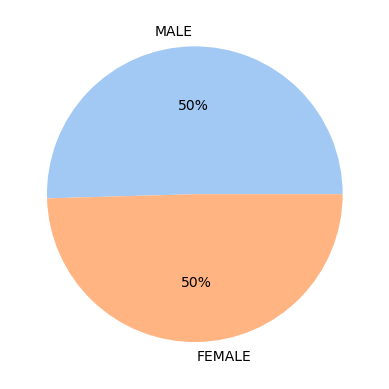

In [32]:
sex_count = cleaned_data["sex"].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%.0f%%')
plt.show()

樣本企鵝的性別比例各半，符合隨機抽樣

### 不同島嶼的企鵝種類數量

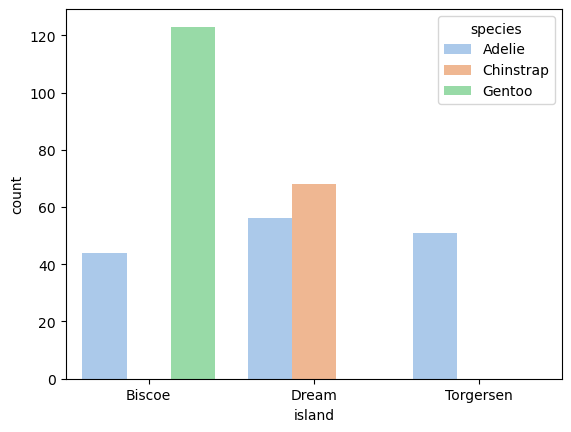

In [34]:
sns.countplot(cleaned_data, x="island", hue="species")
plt.show()

`Adelie` 種類的企鵝在 `Biscoe`、`Dream`、`Torgersen` 三個島上都有，`Chinstrap` 種類只有在 `Dream` 島上才有，`Gentoo` 種類只有在 `Biscoe` 島上才有

### 不同島上的企鵝性別數量

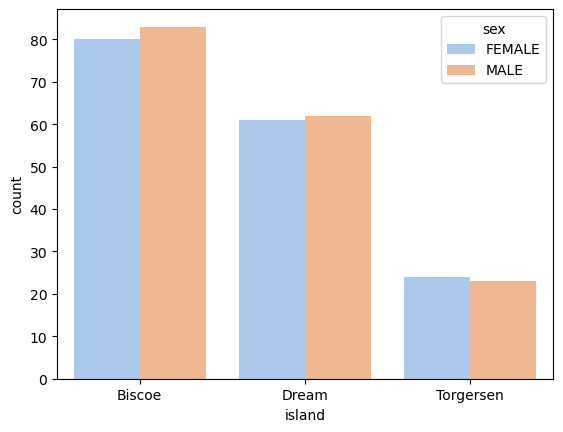

In [35]:
sns.countplot(cleaned_data, x="island", hue="sex")
plt.show()

### 查看數值之間的相關關係

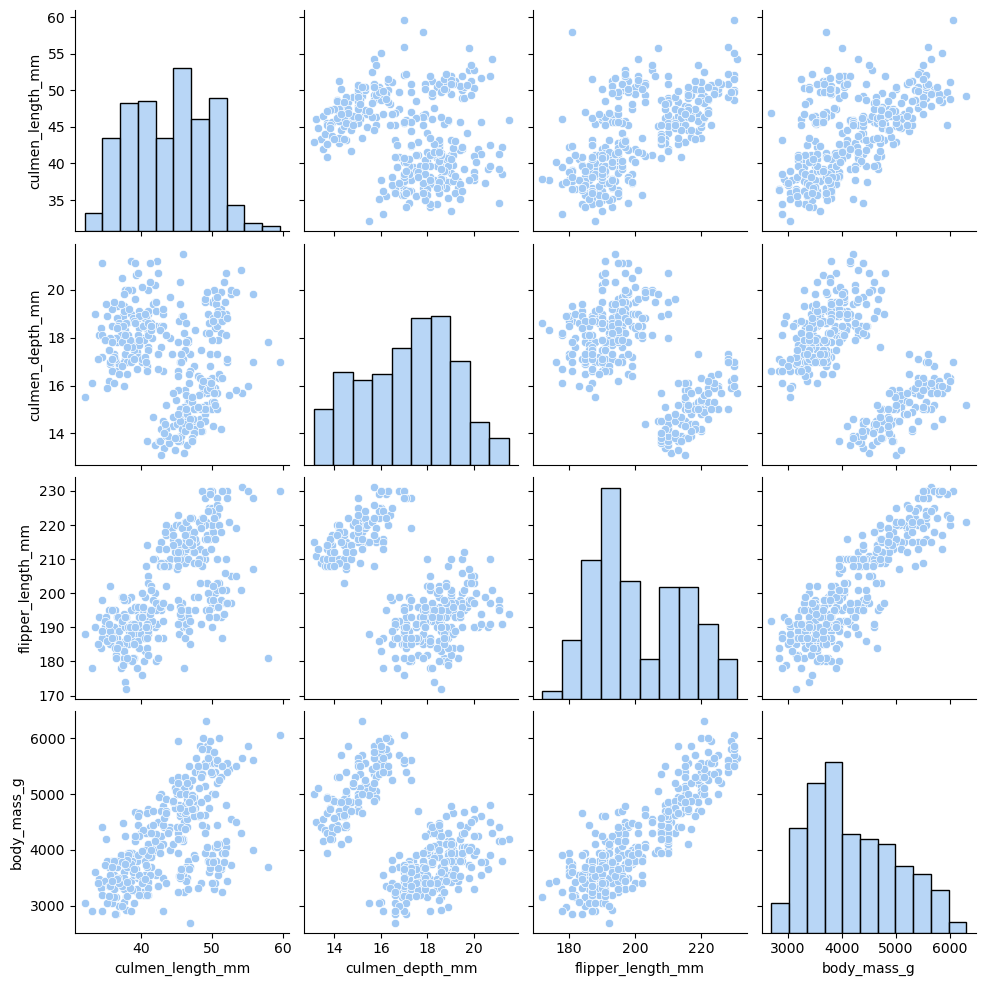

In [41]:
sns.pairplot(cleaned_data)
plt.show()

從直方圖來看，企鵝的嘴峰長度、嘴峰深度、鰭長度、體重的分布不是正態分布

代表可能包含了多組存在差異的樣本，另一方面也可能是因為樣本數量不夠多

根據散點圖看出明顯的多個集群，可能與某些因素相關，例如種類、性別，因此可以進行進一步的分類

### 根據種類查看數值之間的關係

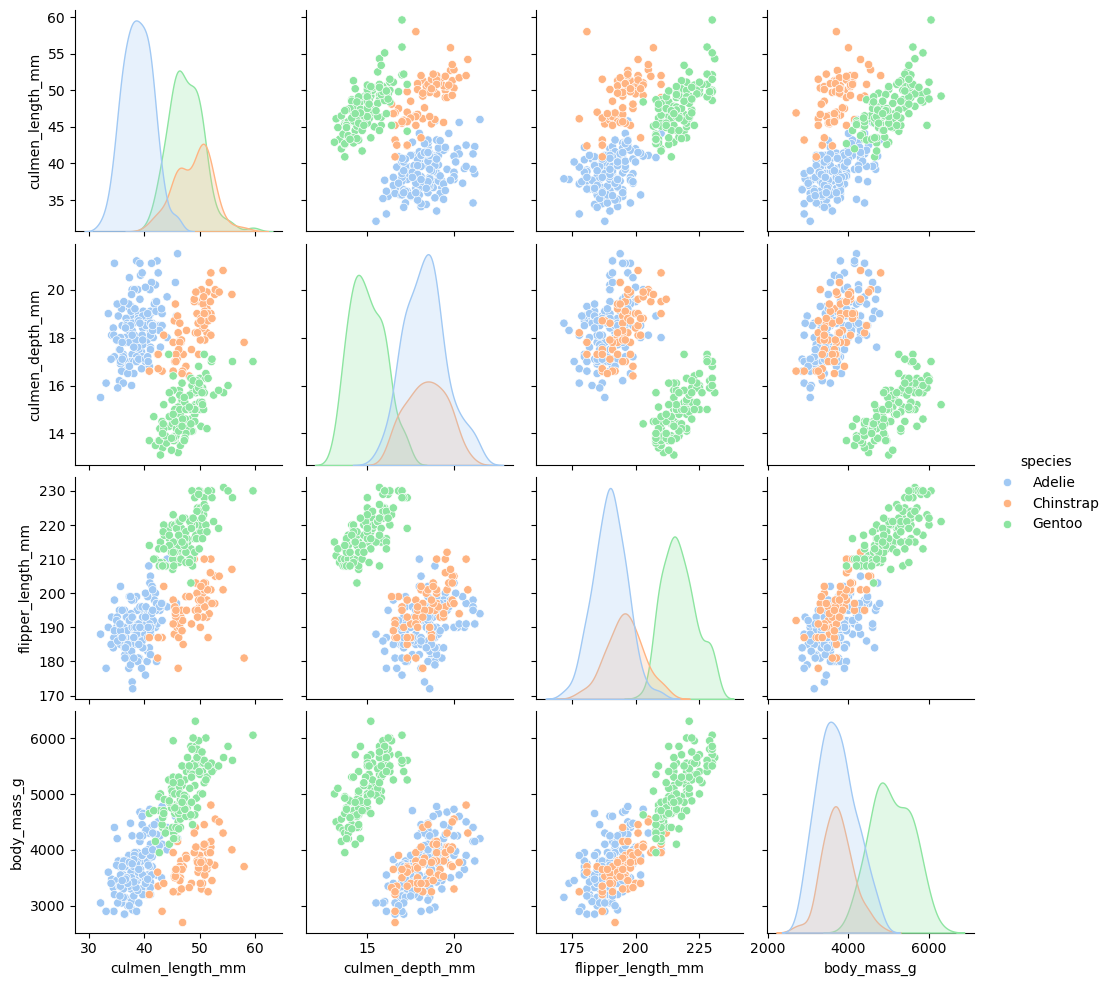

In [42]:
sns.pairplot(cleaned_data, hue="species")
plt.show()

同一種類的企鵝在散點圖上基本上都聚在一起，說明同一種類的企鵝在嘴峰長度、嘴峰深度、鰭長度、體重之間關係上存在相似性

這些有利於根據體重、鰭長度等數值推測企鵝種類，也可以根據企鵝種類推測體重、鰭長等數值

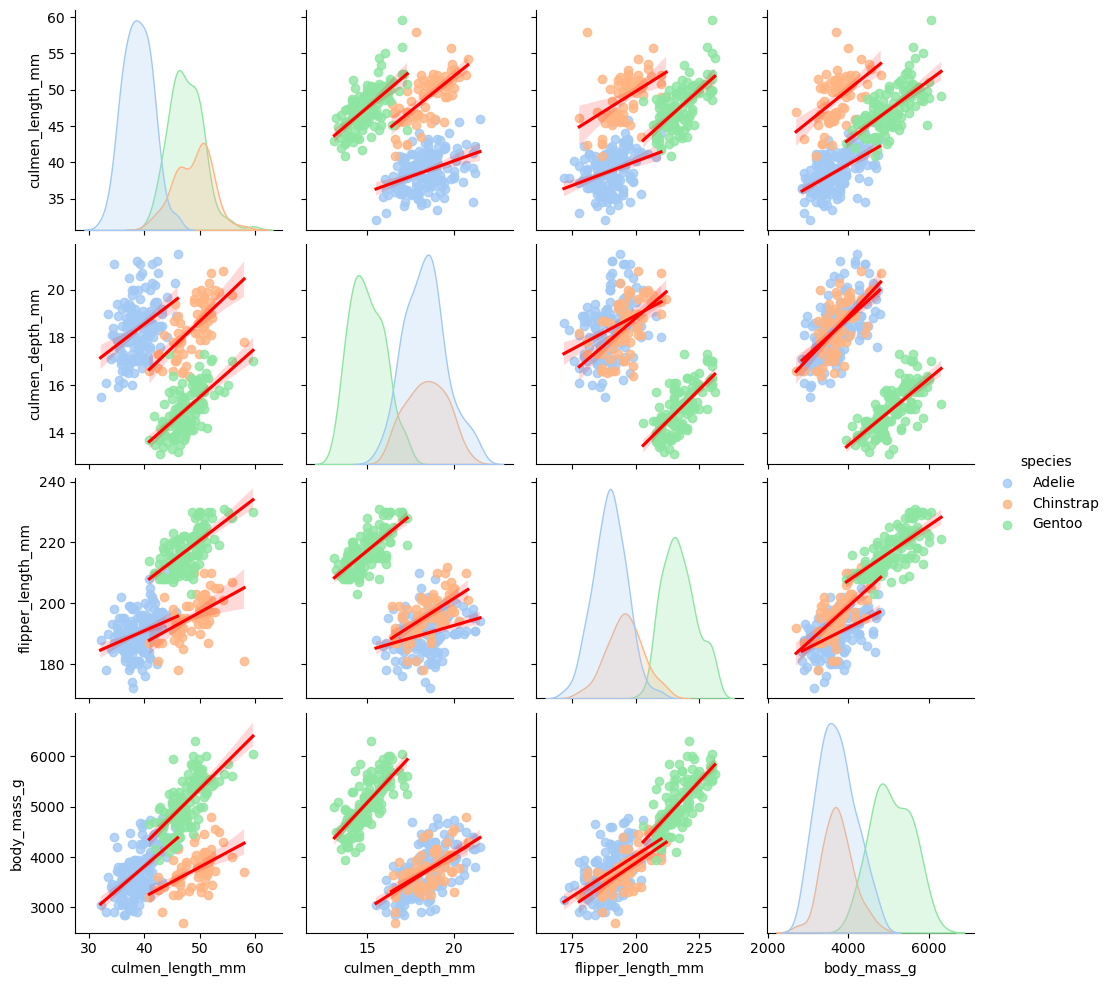

In [45]:
# reg 表示回歸線
sns.pairplot(cleaned_data, hue="species", kind="reg", plot_kws={"line_kws": {"color": "red"}})
plt.show()

散點圖結合線性回歸線來看，同類企鵝的屬性之間均呈線性正比，即嘴峰越長，嘴峰越深，鰭越長，體重越重，反之

從密度圖的分布來看，可以得出以下結論:
- `Chinstrap` 的 `Gentoo` 的嘴峰長度範圍較接近，而 `Adelie` 的嘴峰長度較短
- `Adelie` 的 `Chinstrap` 的嘴峰深度範圍較接近，而 `Gentoo` 的嘴峰深度較短
- `Adelie` 的鰭長度最短，`Chinstrap` 中等，而 `Gentoo` 的鰭長度較長
- `Adelie` 和 `Chinstrap` 的體重範圍較接近，而 `Gentoo` 的體重較重

但不同種類的屬性數值是否還存在統計顯著性差異，仍需要進行假設驗證後才能得到結論

### 根據性別查看數值之間的相關性

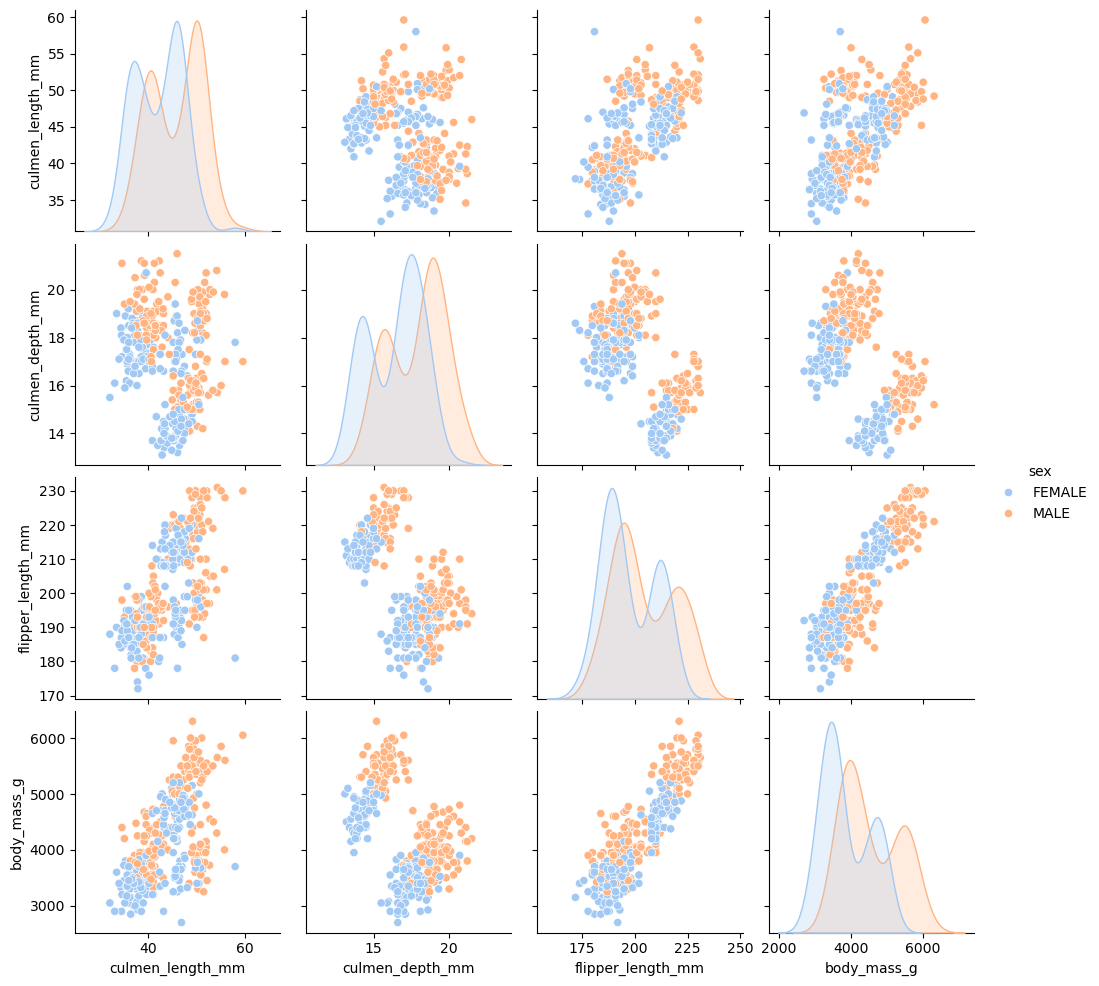

In [46]:
sns.pairplot(cleaned_data, hue="sex")
plt.show()

根據性別劃分後能看出，雄性企鵝在各項屬性均大於雌性企鵝